# Vectorizer 
<pre>
    Vectorizer is the process of converting words into numbers is called vectorizer
</pre>

# CountVectorizer
<pre>
    CountVectorizer means breaking down a sentence or any text into words by performing 
    preprocessing tasks like converting all words to lowercase , thus removing special characters.

    In NLP models can't understand  textual data they only accept numbers, so this textual data
    Needs To Be Vectorized.
</pre>

In [2]:
#Count Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer()

txt = ["I love singing and I love painting"]
x = cv.fit_transform(txt)

In [3]:
x

<1x4 sparse matrix of type '<class 'numpy.int64'>'
	with 4 stored elements in Compressed Sparse Row format>

In [5]:
print(x) #it gives result after arranging alphabatically

  (0, 1)	2
  (0, 3)	1
  (0, 0)	1
  (0, 2)	1


In [7]:
print(cv.vocabulary_) #returns alphabatically of words by their index

{'love': 1, 'singing': 3, 'and': 0, 'painting': 2}


In [9]:
print(x.toarray()) #Output

[[1 2 1 1]]


In [11]:
# using multiple documents or sentences
txt = ["I love singing and I love painting","I love ice-cream"]
x = cv.fit_transform(txt)
x

<2x6 sparse matrix of type '<class 'numpy.int64'>'
	with 7 stored elements in Compressed Sparse Row format>

In [12]:
print(x)

  (0, 3)	2
  (0, 5)	1
  (0, 0)	1
  (0, 4)	1
  (1, 3)	1
  (1, 2)	1
  (1, 1)	1


In [13]:
print(cv.vocabulary_)

{'love': 3, 'singing': 5, 'and': 0, 'painting': 4, 'ice': 2, 'cream': 1}


In [15]:
print(x.toarray())

[[1 0 0 2 1 1]
 [0 1 1 1 0 0]]


# TF-IDF Vectorizer (Term Frequency - Inverse Document Frequency)

In [19]:
#TF-IDF Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer()

txt = ["Earth is a very beautiful place"]
z = tfidf.fit_transform(txt)
z

<1x5 sparse matrix of type '<class 'numpy.float64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [20]:
print(z)

  (0, 3)	0.4472135954999579
  (0, 0)	0.4472135954999579
  (0, 4)	0.4472135954999579
  (0, 2)	0.4472135954999579
  (0, 1)	0.4472135954999579


In [21]:
print(tfidf.vocabulary_)

{'earth': 1, 'is': 2, 'very': 4, 'beautiful': 0, 'place': 3}


In [22]:
print(z.toarray())

[[0.4472136 0.4472136 0.4472136 0.4472136 0.4472136]]


# Spam Mail Detection

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

from wordcloud import WordCloud

In [26]:
#install wordcloud
!pip install wordcloud

In [28]:
data = pd.read_csv(r"D:\jupyter_PY\CTTC-AIML\spam (1).csv",encoding='Latin1') # encoding='Latin1' otherwise it will show error
#encoding 'utf-8'"Unicode trasformation format"8-bits dominating encoder for www encoding = 'ISO-8859-1'(Latin Alphabet-1)
data

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [30]:
data.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [31]:
data.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis = 1,inplace = True)
data.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [32]:
data.columns = ['labels','messages']
data.head()

,labels,messages
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [36]:
data['b_labels'] = data['labels'].map({'ham':0,'spam':1})
data

,labels,messages,b_labels
0,ham,"Go until jurong point, crazy.. Available only ...",0
1,ham,Ok lar... Joking wif u oni...,0
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,1
3,ham,U dun say so early hor... U c already then say...,0
4,ham,"Nah I don't think he goes to usf, he lives aro...",0
...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,1
5568,ham,Will Ì_ b going to esplanade fr home?,0
5569,ham,"Pity, * was in mood for that. So...any other s...",0
5570,ham,The guy did some bitching but I acted like i'd...,0


In [38]:
def fun(n):
    return n**2
fun(3)

9

In [40]:
fun([2,3,4,5])

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

In [41]:
l = [2,3,4,5]
map(fun,l)

In [42]:
list(map(fun,l))

[4, 9, 16, 25]

In [43]:
#ip op creation
ip = data.messages
op = data['b_labels'].values

In [44]:
ip.head()

0    Go until jurong point, crazy.. Available only ...
1                        Ok lar... Joking wif u oni...
2    Free entry in 2 a wkly comp to win FA Cup fina...
3    U dun say so early hor... U c already then say...
4    Nah I don't think he goes to usf, he lives aro...
Name: messages, dtype: object

In [45]:
op

array([0, 0, 1, ..., 0, 0, 0], dtype=int64)

In [48]:
#train test split
x_train,x_test,y_train,y_test = train_test_split(ip,op,test_size=0.35)

In [50]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(3621,)
(3621,)
(1951,)
(1951,)


In [51]:
#Vectorize
tfidf = TfidfVectorizer()

x_train = tfidf.fit_transform(x_train)
x_test = tfidf.transform(x_test)

In [52]:
#Model Training
algo = MultinomialNB()
algo.fit(x_train , y_train)


MultinomialNB()

In [55]:
#Accuracy score
print('Training score : ',algo.score(x_train,y_train))
print('Testing score : ',algo.score(x_test,y_test))

Training score :  0.9690693178679922
Testing score :  0.9605330599692465


In [58]:
#prediction
pred = algo.predict(x_test)
print(pred)

[0 1 0 ... 0 0 0]


In [62]:
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score

ac = accuracy_score(pred,y_test)
re = recall_score(pred,y_test)
pr = precision_score(pred,y_test)
f1 = precision_score(pred,y_test)

print('Acc : ',ac)
print('Recall : ',re)
print('Precision : ',re)
print('f1 : ',f1)

Acc :  0.9605330599692465
Recall :  1.0
Precision :  1.0
f1 :  0.6980392156862745


In [73]:
#Data visualization
def visualize(n):
    words = ''
    for i in data[data.labels==n]['messages']:
        i = i.lower()
        words += i

    wc = WordCloud(width=700,height=500).generate(words)
    plt.imshow(wc)
    plt.axis('off')
    plt.show()

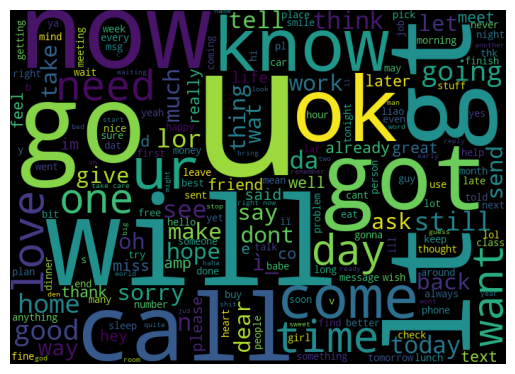

In [74]:
visualize('ham')

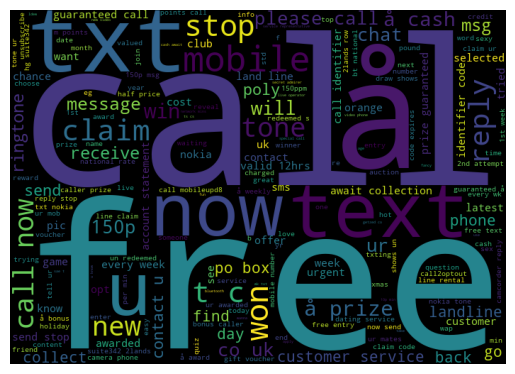

In [75]:
visualize('spam')